# Kaggle案例[泰坦尼克号问题](https://www.kaggle.com/c/titanic)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

print(f'pandas verison is {pd.__version__}')
print(f'numpy version is {np.__version__}')
print(f'numpy version is {mpl.__version__}')

pandas verison is 0.25.1
numpy version is 1.17.2
numpy version is 3.1.1


In [8]:
# load data from file
data_train = pd.read_csv('../datas/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
# 字段说明
col_df = pd.DataFrame(
    np.array(
        [['PassengerId ', '乘客ID'],
        ['Survived ', '存活状况'],
        ['Pclass ', '乘客等级(1/2/3等舱位)'],
        ['Name ', '乘客姓名'],
        ['Sex ', '性别'],
        ['Age ', '年龄'],
        ['SibSp ', '堂兄弟/妹个数'],
        ['Parch ', '父母与小孩个数'],
        ['Ticket ', '船票信息'],
        ['Fare ', '票价'],
        ['Cabin ', '客舱'],
        ['Embarked ', '登船港口']]
    ),
    columns=['field_name', 'field_describe']
)
col_df

,field_name,field_describe
0,PassengerId,乘客ID
1,Survived,存活状况
2,Pclass,乘客等级(1/2/3等舱位)
3,Name,乘客姓名
4,Sex,性别
5,Age,年龄
6,SibSp,堂兄弟/妹个数
7,Parch,父母与小孩个数
8,Ticket,船票信息
9,Fare,票价


In [10]:
# 数据特征信息
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 数据统计数据
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


通过图像化的方式去了解每个特征的分布，以便于更好的理解数据

关于 `matplotlib` 的中文乱码问题可参考[此处](https://www.jb51.net/article/150878.htm)解决

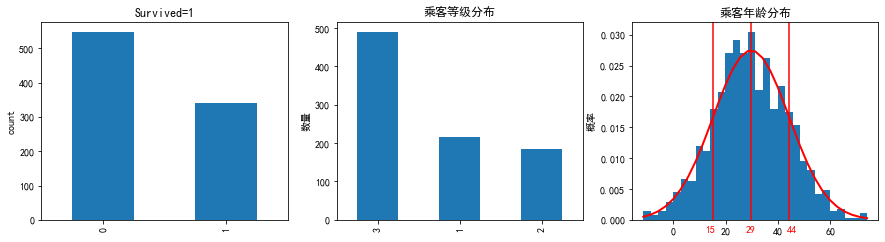

In [33]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
# 设置图形(画布）尺寸
fig = plt.figure(figsize=(15, 8))
# 在画布上画6幅图，按2行3列划分，这幅图换在第1行第1列的位置上
plt.subplot2grid((2, 3), (0, 0))
data_train['Survived'].value_counts().plot.bar()
plt.title("Survived=1")
plt.ylabel("count")
# 在画布上画6幅图，按2行3列划分，这幅图换在第1行第2列的位置上
plt.subplot2grid((2, 3), (0, 1))
data_train['Pclass'].value_counts().plot.bar()
plt.title("乘客等级分布")
plt.ylabel("数量")
# 在画布上画6幅图，按2行3列划分，这幅图换在第1行第3列的位置上
plt.subplot2grid((2, 3), (0, 2))
mu = data_train['Age'].mean()
sigma = data_train['Age'].std()
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.axvline(mu, c='r')
plt.axvline(mu - sigma, c='r')
plt.axvline(mu + sigma, c='r')
plt.text((mu-sigma)-3, -0.002, int(mu-sigma), color='red')
plt.text((mu)-2, -0.002, int(mu), color='red')
plt.text((mu+sigma)-1, -0.002, int(mu+sigma), color='red')
plt.title("乘客年龄分布")
plt.ylabel("概率")


plt.show()